In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import jieba
from wordcloud import WordCloud
from imageio import imread
import warnings

sns.set(style="darkgrid")
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False
warnings.filterwarnings("ignore")

### 数据读取

In [66]:
df = pd.read_csv("笔记本电脑.csv", engine='python', encoding='utf-8-sig', header=None)
df.columns = ["描述信息", "价格", "付款人数", "旗舰店", "发货地址"]
df.head()

,描述信息,价格,付款人数,旗舰店,发货地址
0,【酷睿i5+指纹解锁】2020款全新15.6英寸i5笔记本电脑游戏本超薄手提电脑学生办公用商...,2068.0,1061人付款,宝扬旗舰店,广东 深圳
1,【酷睿i7】2020年新款笔记本电脑轻薄便携学生女生款15.6英寸金属高配超极本超薄商务办公...,1388.0,1.0万+人付款,品纯旗舰店,广东 广州
2,Lenovo/联想吃鸡游戏本i7笔记本电脑轻薄便携商务办公学生独显4G,1380.0,1740人付款,小慧hero,广东 广州
3,【酷睿i7高配】笔记本电脑2020年新款戴睿V15Air金属轻薄便携女生款15.6英寸商务超...,1968.0,9000+人付款,戴睿博雅寰球专卖店,广东 深圳
4,【新品上市】联想拯救者Y7000 2020十代酷睿i5/i7 15.6英寸游戏本笔记本 16...,6499.0,484人付款,联想官方旗舰店,上海


### 数据去重：我们认为“描述信息”和“价格”相同的记录，都是相同的记录。

In [67]:
# 去重之前的记录数
print("去重之前的记录数",df.shape)
# 记录去重
df.drop_duplicates(subset=["描述信息","价格"],inplace=True)
# 去重之后的记录数
print("去重之后的记录数",df.shape)

去重之前的记录数 (4973, 5)
去重之后的记录数 (4936, 5)


### 付款人数字段的处理

In [68]:
# df["付款人数"].unique()
def func1(x):
    if x.find("万") != :
        x = re.findall("(\d+)",x)[0]
        return int(x) * 10000
    else:
        return int(re.findall("(\d+)",x)[0])
    
df["付款人数"] = df["付款人数"].apply(func1)
df.head()

,描述信息,价格,付款人数,旗舰店,发货地址
0,【酷睿i5+指纹解锁】2020款全新15.6英寸i5笔记本电脑游戏本超薄手提电脑学生办公用商...,2068.0,1061,宝扬旗舰店,广东 深圳
1,【酷睿i7】2020年新款笔记本电脑轻薄便携学生女生款15.6英寸金属高配超极本超薄商务办公...,1388.0,10000,品纯旗舰店,广东 广州
2,Lenovo/联想吃鸡游戏本i7笔记本电脑轻薄便携商务办公学生独显4G,1380.0,1740,小慧hero,广东 广州
3,【酷睿i7高配】笔记本电脑2020年新款戴睿V15Air金属轻薄便携女生款15.6英寸商务超...,1968.0,9000,戴睿博雅寰球专卖店,广东 深圳
4,【新品上市】联想拯救者Y7000 2020十代酷睿i5/i7 15.6英寸游戏本笔记本 16...,6499.0,484,联想官方旗舰店,上海


### 发货地址的处理

In [93]:
def func2(x):
    if x.find(" ") != -1:
        return x.split(" ")[1]
    else:
        return x
df["发货地址"] = df["发货地址"].fillna({"发货地址":"无"})
df["发货地址"] = df["发货地址"].apply(func2)
df.head()

,描述信息,价格,付款人数,旗舰店,发货地址
0,【酷睿i5+指纹解锁】2020款全新15.6英寸i5笔记本电脑游戏本超薄手提电脑学生办公用商...,2068.0,1061,宝扬旗舰店,深圳
1,【酷睿i7】2020年新款笔记本电脑轻薄便携学生女生款15.6英寸金属高配超极本超薄商务办公...,1388.0,10000,品纯旗舰店,广州
2,Lenovo/联想吃鸡游戏本i7笔记本电脑轻薄便携商务办公学生独显4G,1380.0,1740,小慧hero,广州
3,【酷睿i7高配】笔记本电脑2020年新款戴睿V15Air金属轻薄便携女生款15.6英寸商务超...,1968.0,9000,戴睿博雅寰球专卖店,深圳
4,【新品上市】联想拯救者Y7000 2020十代酷睿i5/i7 15.6英寸游戏本笔记本 16...,6499.0,484,联想官方旗舰店,上海


In [107]:
tar_cpu = ['联想','惠普','酷睿','苹果','三星','华硕','索尼','宏碁','戴尔','海尔','长城','海尔','神舟','清华同方','方正','明基']
tar_cpu = np.array(tar_cpu)
def rename(x):
    index = [i in x for i in tar_cpu]
    if sum(index) > 0:
        return tar_cpu[index][0]
    else:
        return "牌子不详"
df["电脑品牌"] = df["描述信息"].apply(rename)
df.head()

,描述信息,价格,付款人数,旗舰店,发货地址,电脑品牌
0,【酷睿i5+指纹解锁】2020款全新15.6英寸i5笔记本电脑游戏本超薄手提电脑学生办公用商...,2068.0,1061,宝扬旗舰店,深圳,酷睿
1,【酷睿i7】2020年新款笔记本电脑轻薄便携学生女生款15.6英寸金属高配超极本超薄商务办公...,1388.0,10000,品纯旗舰店,广州,酷睿
2,Lenovo/联想吃鸡游戏本i7笔记本电脑轻薄便携商务办公学生独显4G,1380.0,1740,小慧hero,广州,联想
3,【酷睿i7高配】笔记本电脑2020年新款戴睿V15Air金属轻薄便携女生款15.6英寸商务超...,1968.0,9000,戴睿博雅寰球专卖店,深圳,酷睿
4,【新品上市】联想拯救者Y7000 2020十代酷睿i5/i7 15.6英寸游戏本笔记本 16...,6499.0,484,联想官方旗舰店,上海,联想


In [108]:
# 不同电脑品牌的销量
x = df["电脑品牌"].value_counts().reset_index()
x = x.drop(df.index[1], axis=0)   # 注意这种用法
x.index = np.arange(1,len(x)+1)
x

,index,电脑品牌
1,联想,1208
2,酷睿,830
3,华硕,448
4,惠普,399
5,苹果,325
6,戴尔,266
7,神舟,132
8,宏碁,76
9,三星,20
10,海尔,16


### 描述性息字段的处理

In [113]:
x = "【酷睿i5+指纹解锁】2020款全新15.6英寸i5笔记本电脑游戏本超薄手提电脑学生办公用商务轻薄便携粉色女生款"
# list(jieba.cut(x))

In [152]:
add_word = ['联想','惠普','酷睿','苹果','三星','华硕','索尼','宏碁','戴尔','海尔','长城','海尔','神舟','清华同方','方正','明基'] 
for i in add_word:
    jieba.add_word(i)
df["切分后的描述信息"] = df["描述信息"].apply(lambda x:jieba.lcut(x))
df.head()

,描述信息,价格,付款人数,旗舰店,发货地址,电脑品牌,切分后的描述信息
0,【酷睿i5+指纹解锁】2020款全新15.6英寸i5笔记本电脑游戏本超薄手提电脑学生办公用商...,2068.0,1061,宝扬旗舰店,深圳,酷睿,"[【, 酷睿, i5, +, 指纹, 解锁, 】, 2020, 款, 全新, 15.6, 英..."
1,【酷睿i7】2020年新款笔记本电脑轻薄便携学生女生款15.6英寸金属高配超极本超薄商务办公...,1388.0,10000,品纯旗舰店,广州,酷睿,"[【, 酷睿, i7, 】, 2020, 年, 新款, 笔记本电脑, 轻薄, 便携, 学生,..."
2,Lenovo/联想吃鸡游戏本i7笔记本电脑轻薄便携商务办公学生独显4G,1380.0,1740,小慧hero,广州,联想,"[Lenovo, /, 联想, 吃, 鸡, 游戏, 本, i7, 笔记本电脑, 轻薄, 便携..."
3,【酷睿i7高配】笔记本电脑2020年新款戴睿V15Air金属轻薄便携女生款15.6英寸商务超...,1968.0,9000,戴睿博雅寰球专卖店,深圳,酷睿,"[【, 酷睿, i7, 高配, 】, 笔记本电脑, 2020, 年, 新款, 戴睿, V15..."
4,【新品上市】联想拯救者Y7000 2020十代酷睿i5/i7 15.6英寸游戏本笔记本 16...,6499.0,484,联想官方旗舰店,上海,联想,"[【, 新品, 上市, 】, 联想, 拯救, 者, Y7000, , 2020, 十代, ..."


In [153]:
### 都去停用词
with open("stoplist.txt", encoding="utf8") as f:
    stop = f.read()
stop = stop.split()
stop = [" ","笔记本电脑"] + stop
stop[:10]

[' ', '笔记本电脑', '\ufeff', '说', '人', '元', 'hellip', '&', ',', '?']

In [154]:
df["切分后的描述信息"] = df["切分后的描述信息"].apply(lambda x: [i for i in x if i not in stop])
df.head()

,描述信息,价格,付款人数,旗舰店,发货地址,电脑品牌,切分后的描述信息
0,【酷睿i5+指纹解锁】2020款全新15.6英寸i5笔记本电脑游戏本超薄手提电脑学生办公用商...,2068.0,1061,宝扬旗舰店,深圳,酷睿,"[酷睿, i5, 指纹, 解锁, 2020, 款, 全新, 15.6, 英寸, i5, 游戏..."
1,【酷睿i7】2020年新款笔记本电脑轻薄便携学生女生款15.6英寸金属高配超极本超薄商务办公...,1388.0,10000,品纯旗舰店,广州,酷睿,"[酷睿, i7, 2020, 年, 新款, 轻薄, 便携, 学生, 女生, 款, 15.6,..."
2,Lenovo/联想吃鸡游戏本i7笔记本电脑轻薄便携商务办公学生独显4G,1380.0,1740,小慧hero,广州,联想,"[Lenovo, 联想, 吃, 鸡, 游戏, i7, 轻薄, 便携, 商务, 办公, 学生,..."
3,【酷睿i7高配】笔记本电脑2020年新款戴睿V15Air金属轻薄便携女生款15.6英寸商务超...,1968.0,9000,戴睿博雅寰球专卖店,深圳,酷睿,"[酷睿, i7, 高配, 2020, 年, 新款, 戴睿, V15Air, 金属, 轻薄, ..."
4,【新品上市】联想拯救者Y7000 2020十代酷睿i5/i7 15.6英寸游戏本笔记本 16...,6499.0,484,联想官方旗舰店,上海,联想,"[新品, 上市, 联想, 拯救, Y7000, 2020, 十代, 酷睿, i5, i7, ..."


In [164]:
all_words = []
for i in df["切分后的描述信息"]:
    for j in i:
        all_words.extend(i)
word_count = pd.Series(all_words).value_counts()
print(word_count[:20])

轻薄      44274
游戏      43175
学生      39933
办公      37461
商务      35209
便携      33845
英寸      32490
i7      25629
酷睿      24654
手提      24276
i5      21843
独显      19521
联想      19088
15.6    18403
十代      18334
2020    17252
超薄      17057
14      16268
款       12189
吃       11392
dtype: int64


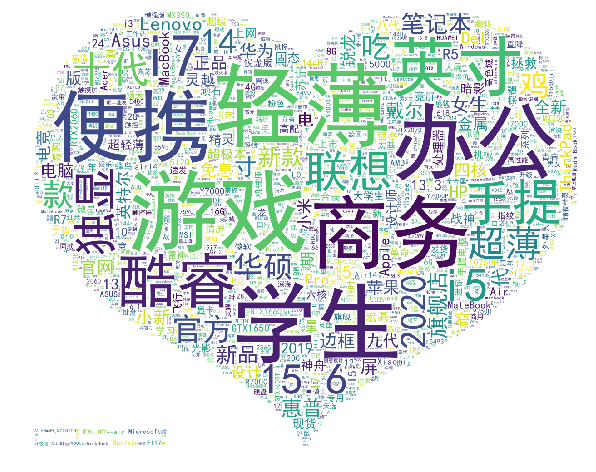

In [169]:
# 1、读取背景图片
back_picture = imread("aixin.jpg")

# 2、设置词云参数
wc = WordCloud(font_path="G:\\6Tipdm\\wordcloud\\simhei.ttf",
               background_color="white",
               max_words=2000,
               mask=back_picture,
               max_font_size=200,
               random_state=42
              )
wc2 = wc.fit_words(word_count)

# 3、绘制词云图
plt.figure(figsize=(16,8))
plt.imshow(wc2)
plt.axis("off")
plt.show()
wc.to_file("电脑.png")

### 将清洗好的数据，导出

In [170]:
df.to_excel("清洗后的数据.xlsx",encoding="utf-8-sig",index=None)

In [179]:
df1 = df.sort_values(by="价格", axis=0, ascending=False)
df1 = df1.iloc[:10,:]
df1.to_excel("价格 排名前10的数据.xlsx",encoding="utf-8-sig",index=None)

In [180]:
df1

,描述信息,价格,付款人数,旗舰店,发货地址,电脑品牌,切分后的描述信息
1496,外星人alienware A51M 17.3英寸2080独显144hz游戏笔记本电脑1968...,48948.0,9,alienware外星人旗舰店,北京,牌子不详,"[外星人, alienware, A51M, 17.3, 英寸, 2080, 独显, 144..."
1428,alienware外星人A51M 17.3英寸i7八核RTX2080独显144hz电竞屏 游...,37998.0,5,alienware外星人旗舰店,北京,牌子不详,"[alienware, 外星人, A51M, 17.3, 英寸, i7, 八核, RTX20..."
613,【新品上市】ALIENWARE外星人m17 2020版R3十代酷睿i7/i9游戏高配2080...,32999.0,10,alienware外星人旗舰店,北京,酷睿,"[新品, 上市, ALIENWARE, 外星人, m17, 2020, 版, R3, 十代,..."
1929,RazerBlade雷蛇灵刃15精英版轻薄电竞游戏笔记本电脑英特尔酷睿十代i7八核处理器RT...,29999.0,3,雷蛇官方旗舰店,扬州,酷睿,"[RazerBlade, 雷蛇, 灵刃, 15, 精英, 版, 轻薄, 电竞, 游戏, 英特..."
4203,ROG/玩家国度 冰刃3s Plus 九代酷睿i7-9750H RTX2080 Max-Q ...,28999.0,3,rog玩家国度网硕专卖店,杭州,酷睿,"[ROG, 玩家, 国度, 冰刃, 3s, Plus, 九代, 酷睿, i7, 9750H,..."
4855,ROG/玩家国度 冰刃3s Plus 九代酷睿i7-9750H RTX2080 Max-Q ...,27999.0,4,rog玩家国度网硕专卖店,宁波,酷睿,"[ROG, 玩家, 国度, 冰刃, 3s, Plus, 九代, 酷睿, i7, 9750H,..."
874,【24期免息 新品上市】ALIENWARE外星人m17 2020版R3十代酷睿i7游戏高配2...,26999.0,53,alienware外星人旗舰店,北京,酷睿,"[24, 期, 免息, 新品, 上市, ALIENWARE, 外星人, m17, 2020,..."
1919,RazerBlade雷蛇灵刃15精英版轻薄电竞游戏笔记本电脑英特尔酷睿十代i7八核处理器RT...,26999.0,3,雷蛇官方旗舰店,扬州,酷睿,"[RazerBlade, 雷蛇, 灵刃, 15, 精英, 版, 轻薄, 电竞, 游戏, 英特..."
4615,Asus/华硕 灵耀X2PRO i9-9980HK八核RTX2060双屏商务笔记本电脑4K,26949.0,4,网网部落,上海,华硕,"[Asus, 华硕, 灵耀, X2PRO, i9, 9980HK, 八核, RTX2060,..."
2588,Asus/华硕灵耀X2 Pro/Duo酷睿i9双4K触摸屏超薄笔记本电脑i7设计,26699.0,19,hshijingk,上海,酷睿,"[Asus, 华硕, 灵耀, X2, Pro, Duo, 酷睿, i9, 双, 4K, 触摸..."
